## Intro

In [92]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
bonobos = pd.read_csv('Bonobos.csv')
# Lets name the bonobos later to make them more interesting
new_name_dict = {"De": "Denise", "Ki": "King Bonobong", "Re":"Reek", "Dz":"Dzachoo",
 "Ho": 'Ho ho ho', "He": 'Helios', "Ko": 'Kobra'}

In [ ]:
# create a weighted edgelist
df = (bonobos
      .rename(columns = {"Chasing":'source', 'Retreating':'target'})
      .groupby(['source', 'target'])
      .size()
      .to_frame('weight')
      .reset_index())

# create a networkX graph
G = nx.from_pandas_edgelist(df, edge_attr = True, create_using=nx.DiGraph())

In [2]:
# get a table of weighted and unweighted in- and out- degrees
def get_degree_df(G):
    """
    Takes in a weighted, directed networkx graph object.
    
    Returns a pandas dataframe of weighted and unweighted indegrees and outdegrees
    """
    # Grab the weighted/ unweighted in-degrees and out degrees
    out_degree = dict(G.out_degree(weight = 'weight'))
    in_degree = dict(G.in_degree(weight = 'weight'))
    unweighted_in_degree = dict(G.in_degree())
    unweighted_out_degree = dict(G.out_degree)
    
    # merge the dictionaries
    degrees = {key: (out_degree.get(key), in_degree.get(key), unweighted_in_degree.get(key), 
               unweighted_out_degree.get(key))
          for key in out_degree.keys() | in_degree.keys() | unweighted_in_degree.keys() |
         unweighted_out_degree.keys()}
    
    # make our dataframe
    deg_df = (pd.DataFrame
     .from_dict(result, orient='index')
     .rename(columns = {0:"out_degree", 1:"in_degree",
                       2:"unweighted_in_degree", 3:"unweighted_out_degree"}))
    
    return deg_df

# change the names and write it to csv
deg_df = get_degree_df(G)
deg_df.rename(new_name_dict, axis = 0).to_csv('bonobo_degree.csv', index = True)

In [594]:
def get_degree_df(G):
    """
    Takes in a weighted, directed networkx graph object.
    
    Returns a pandas dataframe of weighted and unweighted indegrees and outdegrees
    """
    # Grab the weighted/ unweighted in-degrees and out degrees
    out_degree = dict(G.out_degree(weight = 'weight'))
    in_degree = dict(G.in_degree(weight = 'weight'))
    unweighted_in_degree = dict(G.in_degree())
    unweighted_out_degree = dict(G.out_degree)
    
    # merge the dictionaries
    degrees = {key: (out_degree.get(key), in_degree.get(key), unweighted_in_degree.get(key), 
               unweighted_out_degree.get(key))
          for key in out_degree.keys() | in_degree.keys() | unweighted_in_degree.keys() |
         unweighted_out_degree.keys()}
    
    # make our dataframe
    deg_df = (pd.DataFrame
     .from_dict(result, orient='index')
     .rename(columns = {0:"out_degree", 1:"in_degree",
                       2:"unweighted_in_degree", 3:"unweighted_out_degree"}))
    
    return deg_df

In [606]:
deg_df = get_degree_df(G)

In [608]:
deg_df.rename(new_name_dict, axis = 0).to_csv('bonobo_degree.csv', index = True)

## Calculate David's Scores

In [609]:
def davids_score(G):
    """
    Calculates David's Scores for a directed, weighted NetworkX Graph object.
    
    Returns a matrix of David's Scores that with indices corresponding to G.nodes()
    """
    
    adj = nx.adjacency_matrix(G)
    # convert to a dense matrix
    X = (adj.todense())
    # networkX's adjacency matrix needs to be transposed in order to be read correctly
    tmat = X.T+1
    # create a symmetrical matrix
    sym = X + tmat
    
    # Create a weighted proportion Matrix
    Dij = np.divide(tmat, sym) - (((np.divide(tmat, sym) - 0.5)/(sym+1)))
    
    # get row and col sums of proportion matrix
    w1 = np.sum(Dij, axis = 0)
    w2 = np.dot(w1, Dij)
    
    # get row and col sums weighted by the proportion matrix
    l1 = np.sum(Dij, axis = 1)
    l2 = l1.T * Dij
    
    # Get David's Scores for each node
    DS = w1 + w2 - l1.T - l2
    
    return DS

In [610]:
DS = davids_score(G)

## Inspect and visualize

In [599]:
ds_df = pd.DataFrame(DS.T)
ds_df.index = list(G.nodes())

In [614]:
ds_df.rename(new_name_dict, axis = 0).rename(columns={0:"david's score"}).to_csv('david_scores.csv')

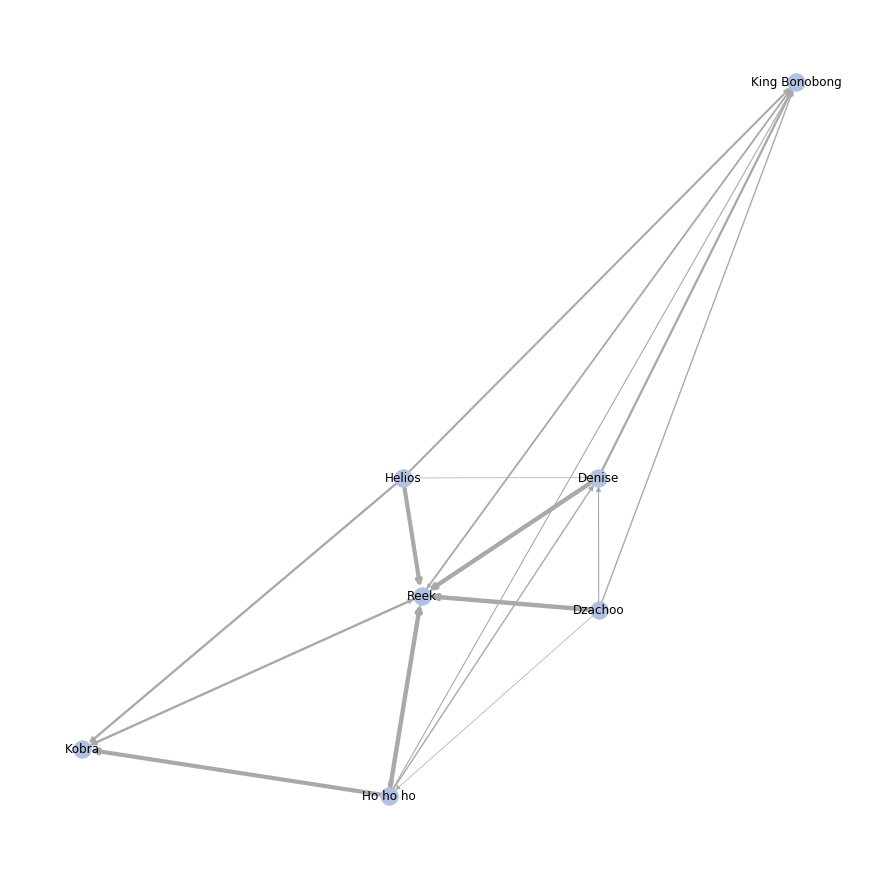

In [613]:
G2 = nx.relabel_nodes(G, new_name_dict)
weights = [math.log(x) for i, x in enumerate(list(nx.get_edge_attributes(G2,'weight').values()))]
pos = nx.spring_layout(G2, iterations=50)
fig = plt.figure(figsize=(12,12))
nx.draw(G2, pos, 
        width=list(weights),
        with_labels=True,
        node_color='#B1C1E2',
        edge_color = '#A9A9A9')
plt.savefig("bonobos.png", format="PNG", dpi = 300)